In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
!pip install xgboost

In [27]:
# Optional: XGBoost
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

In [51]:
## 2. Load and Inspect Data
df = pd.read_csv("C:/Users/vishw/Downloads/PRCP-1017-AutoPricePred/Data/auto_imports.csv", header=None, names=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [53]:
## 3. Data Cleaning
numeric_cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=["price"], inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

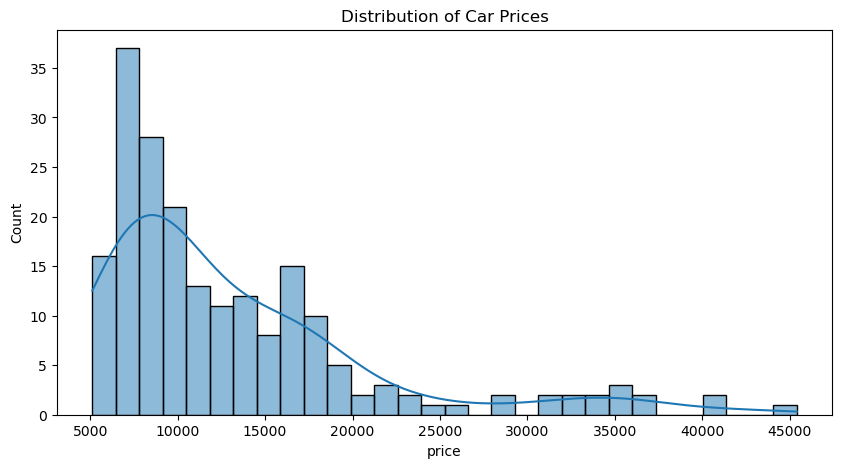

In [55]:
## 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.show()

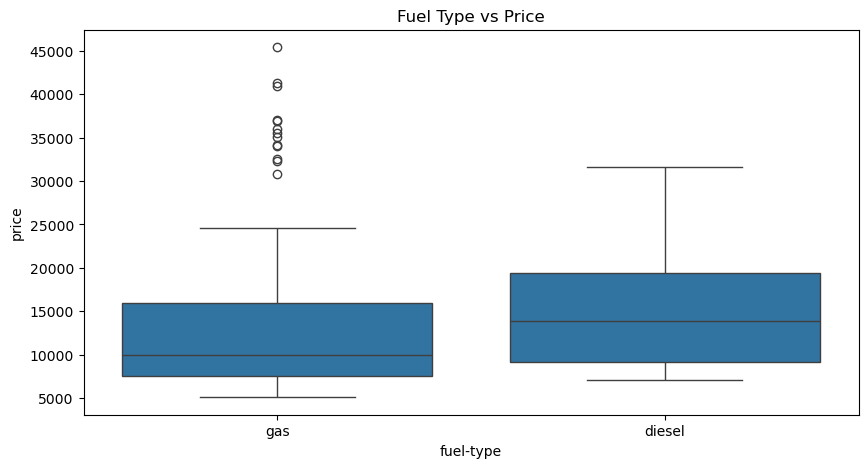

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='fuel-type', y='price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

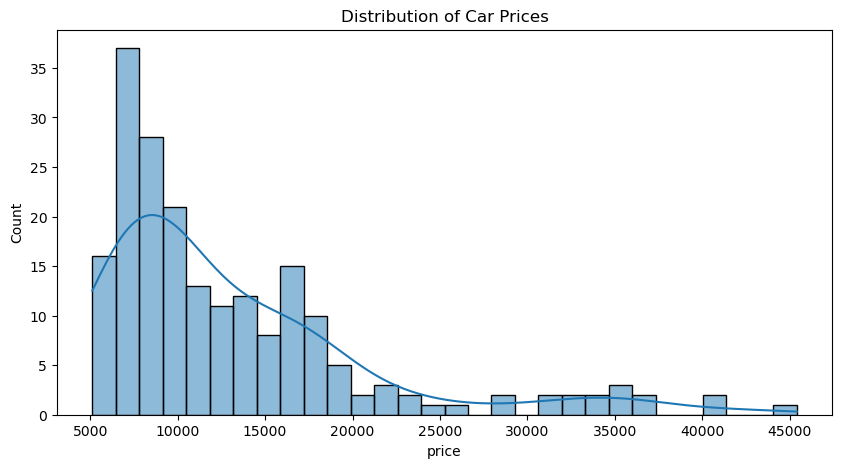

In [59]:
## 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.show()

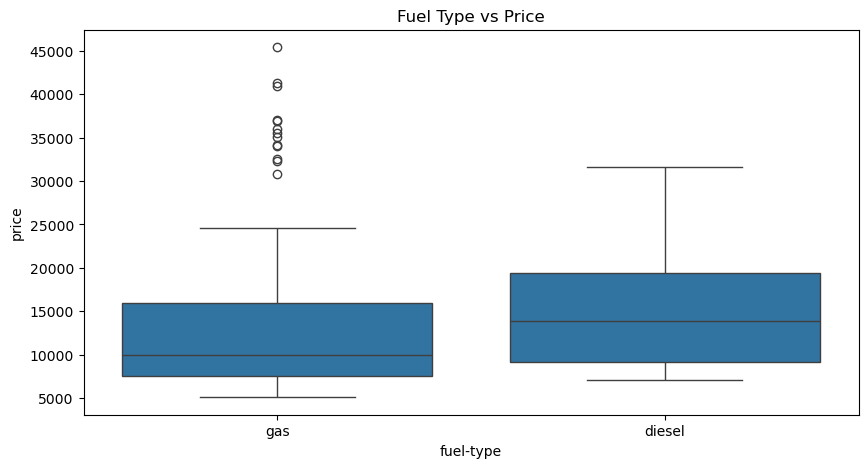

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x='fuel-type', y='price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

In [77]:
## 5. Encoding and Feature Scaling
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X = df.drop("price", axis=1)
y = df["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [79]:
## 6. Model Training and Evaluation# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [81]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [71]:
# XGBoost (if available)
if xgb_available:
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)

In [83]:
## 7. Model Evaluation
def evaluate(name, y_true, y_pred):
    print("---", name, "---")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print()

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)

if xgb_available:
    evaluate("XGBoost", y_test, y_pred_xgb)
else:
    print("XGBoost is not installed.")

--- Linear Regression ---
R2 Score: 0.8534952162948305
RMSE: 4233.720293961895

--- Random Forest ---
R2 Score: 0.9332142851163252
RMSE: 2858.4990299172946

--- XGBoost ---
R2 Score: 0.9421864748001099
RMSE: 2659.5671157669267

